In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

Matplotlib is building the font cache; this may take a moment.


In [88]:
my_data_dir = 'C:\\Users\\Priyanshu Singh\\Desktop\\project\\Dataset'

In [89]:
os.listdir(my_data_dir) 

['gs', 'Test', 'Train']

In [90]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [91]:
os.listdir(test_path)

['Parasite', 'Uninfected']

In [92]:
os.listdir(train_path)

['Parasite', 'Uninfected']

In [93]:
os.listdir(train_path+'\\parasite')[0]

'C133P94ThinF_IMG_20151004_155721_cell_111 - Copy (2) - Copy - Copy.png'

In [94]:
para_cell = 'C:\\Users\\Priyanshu Singh\\Desktop\\project\\Dataset\\Test\\Parasite\\C39P4thinF_original_IMG_20150622_105554_cell_9.png'

In [95]:
para_img= imread(para_cell)

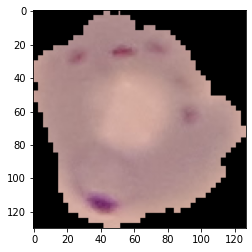

In [96]:
plt.imshow(para_img)

In [97]:
para_img.shape

(130, 127, 3)

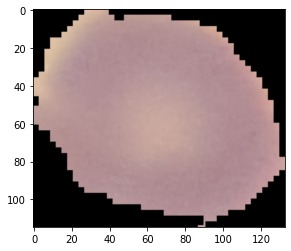

In [98]:
unifected_cell_path = train_path+'\\Uninfected\\'+os.listdir(train_path+'\\Uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [99]:
len(os.listdir(train_path+'\\parasite'))

3520

In [100]:
len(os.listdir(train_path+'\\uninfected'))

3136

In [53]:
unifected_cell.shape

(115, 133, 3)

In [54]:
para_img.shape

(130, 127, 3)

In [55]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\Priyanshu Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


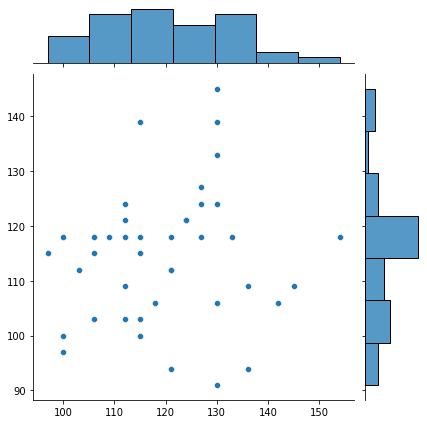

In [56]:
sns.jointplot(dim1,dim2)

In [57]:
np.mean(dim1)

120.16279069767442

In [58]:
np.mean(dim2)

114.72093023255815

In [101]:
image_shape = (120,114,3)

In [102]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

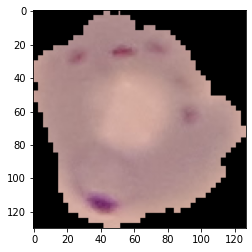

In [62]:
plt.imshow(para_img)

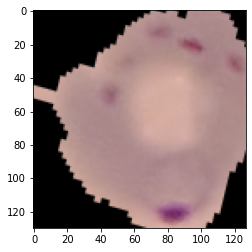

In [63]:
plt.imshow(image_gen.random_transform(para_img))

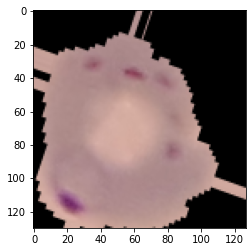

In [64]:
plt.imshow(image_gen.random_transform(para_img))

In [65]:
image_gen.flow_from_directory(train_path)

Found 3328 images belonging to 2 classes.


In [66]:
image_gen.flow_from_directory(test_path)

Found 134 images belonging to 2 classes.


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [68]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [72]:
batch_size = 16

In [73]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 3328 images belonging to 2 classes.


In [74]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 134 images belonging to 2 classes.


In [75]:
train_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [77]:
results = model.fit_generator(train_image_gen,epochs=1,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

C:\Users\Priyanshu Singh\AppData\Local\Temp\ipykernel_6520\4172053786.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=1,


208/208 [==============================] - 314s 2s/step - loss: 0.3524 - accuracy: 0.8471 - val_loss: 0.4304 - val_accuracy: 0.7910


In [79]:
from tensorflow.keras.models import load_model
model.save('mal_det.h5')